# Análise exploratória de dados

In [5]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura do conjunto de dados
***

In [6]:
df = pd.read_csv('../data/raw/obesity_dataset.csv')
display(df)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Podemos observar o tipo de cada um dos dados.
***

In [39]:
unique_values = df['NObeyesdad'].unique()
print(unique_values)

['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


## 1. Descrição dos dados

![image.png](https://jaleko-blog-files.s3.amazonaws.com/wp-content/uploads/2020/11/05142745/large-Dia-combate-obesidade-810x693.png)!

[Obesity Level](https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels) é um conjunto de dados com informações para a estimativa dos níveis de obesidade em indivíduos dos países México, Peru e Colômbia, com base em seus hábitos alimentares e condição física.

Em projetos de *machine learning*, a variável ```NObeyesdad``` será a variável *target*, enquando as demais variáveis serão as *features*

Estes dados foram disponibilizados por [Fatemeh Mehrparvar](https://www.kaggle.com/fatemehmehrparvar)

**Dicionário de dados**

In [80]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
pd.set_option('display.max_colwidth', None)
dicionario

,variavel,descricao,tipo,subtipo
0,Age,idade do indivíduo,quantitativa,contínua
1,Gender,gênero do indivíduo,qualitativa,nominal
2,Height,altura do indiíduo,quantitativa,contínua
3,Weight,peso do indivíduo,quantitativa,contínua
4,CALC,frequência do consumo de álcool pelo indivíduo,qualitativa,ordinal
5,FAVC,indica se o indivíduo consome comidas altamentes calóricas com frequência,qualitativa,nominal
6,FCVC,indica o nível de consumo de vegetais nas refeições do indivíduo,quantitativa,discreta
7,NCP,quantas refeições principais o indivíduo faz diariamente,quantitativa,contínua
8,SCC,indica se o indivíduo monitora as calorias ingeridas diariamente,qualitativa,nominal
9,SMOKE,indica se o indivíduo fuma ou não,qualitativa,nominal


São 17 variáveis: 
- 9 qualitativas, sendo 6 nominais e 3 ordinais;
- 8 quantitativas sendo 7 contínuas e 1 discreta;
***

## 2. Perguntas de partida e hipóteses

*Existem dados faltantes, se sim quantos e em quais variáveis?*

- Hipótese: Não há dados nulos

*Qual é a distribuição dos níveis de obesidade em relação à idade dos indivíduos?*

- Hipótese: A idade tem uma influência significativa no nível de obesidade, com indivíduos mais velhos apresentando níveis mais altos de obesidade.

*Existe uma relação entre a altura dos indivíduos e o nível de obesidade?*
- Hipótese: A altura não tem uma correlação significativa com o nível de obesidade; ou seja, a altura não é um fator determinante no nível de obesidade.

*Como os hábitos de vida, como o consumo de bebidas alcoólicas e o tabagismo, estão associados aos níveis de obesidade?*
- Hipótese: Indivíduos que consomem bebidas alcoólicas ou fumam têm uma maior probabilidade de apresentar níveis mais altos de obesidade.

*Qual é o impacto do histórico familiar de sobrepeso nos níveis de obesidade dos indivíduos?*
- Hipótese: Indivíduos com histórico familiar de sobrepeso têm maior probabilidade de apresentar níveis mais altos de obesidade.

*Existe uma relação entre o método de transporte utilizado (MTRANS) e o nível de obesidade?*
- Hipótese: Indivíduos que utilizam transporte público (em vez de caminhar ou andar de bicicleta) tendem a ter níveis mais altos de obesidade.. mais altos de obesidade.

## 2.1 Distribuição e visualização dos dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [129]:
pd.DataFrame(df.isna().sum()).T.style.background_gradient(cmap='rainbow')

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 Podemos observar que não há dados faltantes.

***

In [128]:
df.describe(percentiles=[0, .25, .30, .50, .75, .80, 1]).T.style.background_gradient(cmap = 'inferno')

,count,mean,std,min,0%,25%,30%,50%,75%,80%,100%,max
Age,2111.000000,24.312600,6.345968,14.000000,14.000000,19.947192,20.654752,22.777890,26.000000,28.393111,61.000000,61.000000
Height,2111.000000,1.701677,0.093305,1.450000,1.450000,1.630000,1.644682,1.700499,1.768464,1.784049,1.980000,1.980000
Weight,2111.000000,86.586058,26.191172,39.000000,39.000000,65.473343,70.000000,83.000000,107.430682,111.914361,173.000000,173.000000
FCVC,2111.000000,2.419043,0.533927,1.000000,1.000000,2.000000,2.000000,2.385502,3.000000,3.000000,3.000000,3.000000
NCP,2111.000000,2.685628,0.778039,1.000000,1.000000,2.658738,2.961192,3.000000,3.000000,3.000000,4.000000,4.000000
CH2O,2111.000000,2.008011,0.612953,1.000000,1.000000,1.584812,1.791286,2.000000,2.477420,2.632871,3.000000,3.000000
FAF,2111.000000,1.010298,0.850592,0.000000,0.000000,0.124505,0.292093,1.000000,1.666678,1.949667,3.000000,3.000000
TUE,2111.000000,0.657866,0.608927,0.000000,0.000000,0.000000,0.080128,0.625350,1.000000,1.000000,2.000000,2.000000


- As idades dos voluntários variam de 14 a 61 anos, com uma média de aproximadamente 24 anos de idade. 
- O gênero dos voluntários é distribuído entre masculino e feminino, com uma ligeira predominância de participantes masculinos.
- A altura dos voluntários varia de 1.45 a 1.98 metros, com uma média de aproximadamente 1.70 metros.
- O peso dos voluntários varia de 39 a 173 kg, com uma média de aproximadamente 86.59 kg.
- A maioria dos voluntários consome álcool às vezes.
- A maioria dos voluntários tem o hábito de consumir alimentos com alto teor de gordura.
- A frequência de consumo de vegetais varia de 1 a 3, com uma média de 2.42.
- A maioria dos voluntários faz entre 2 e 3 refeições principais por dia.
- A quantidade de água consumida diariamente varia de 1 a 3, com uma média de 2.01.
- A frequência de atividade física semanal varia de 0 a 3, com uma média de 1.01.
- O uso de tecnologia para exercício varia de 0 a 2, com uma média de 0.66.

***

## Matriz de Correlação

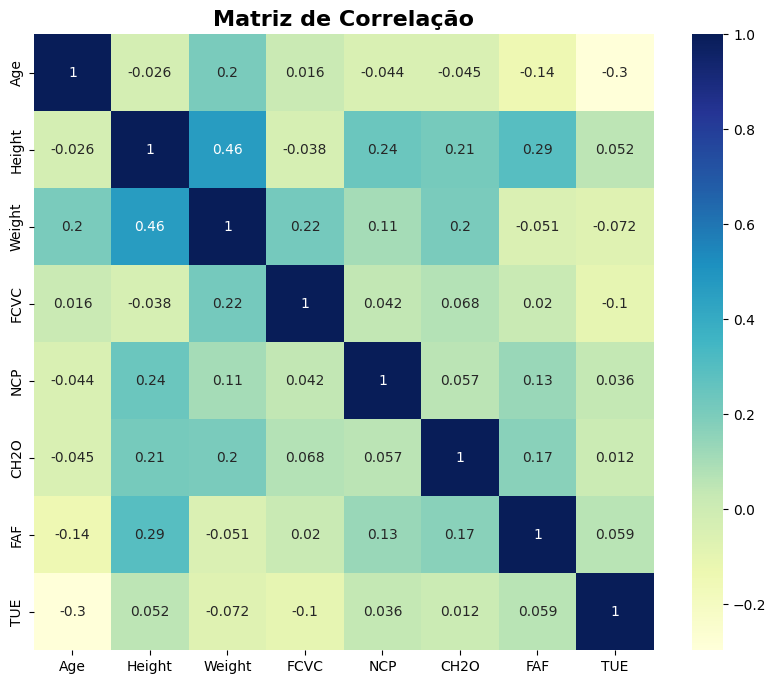

In [10]:
plt.figure(figsize=(10, 8))

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Matriz de Correlação", fontsize=16, fontweight="bold")
plt.show()

Observa-se que as variáveis independentes que parecem ter o maior impacto na variável dependente são Peso, História Familiar e CAEC.
 ***

In [ ]:
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 6))

# order_colors = {"Male": "gray", "Female": "purple"}
# sns.countplot(x="Gender", data=df, order=order_colors.keys(), palette=order_colors.values(), ax=axes[0], orient='h')
# axes[0].set_title("Distribuição dos Gêneros", fontsize=14, fontweight="bold")
# axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
# for i, count in enumerate(df["Gender"].value_counts()):
#     axes[0].text(i, count, str(count), ha='center', va='bottom')

# caec_order = df['CAEC'].value_counts().index
# sns.countplot(x='CAEC', data=df, order=caec_order, palette='viridis', ax=axes[1], orient='h')
# axes[1].set_title('Distribuição da Frequência de Atividades Físicas', fontsize=16, fontweight='bold')
# axes[1].set_xlabel('Frequência de Atividades Físicas')
# axes[1].set_ylabel('Número de Indivíduos')
# axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# sorted_obesity_levels = df['NObeyesdad'].value_counts().index
# sns.countplot(x="NObeyesdad", data=df, order=sorted_obesity_levels, palette="Greens_d", ax=axes[2], orient='h')
# axes[2].set_title("Distribuição dos Níveis de Obesidade", fontsize=14, fontweight="bold")
# axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
# for i, count in enumerate(df['NObeyesdad'].value_counts()):
#     axes[2].text(i, count, str(count), ha='center', va='bottom')

# plt.tight_layout()
# plt.show()

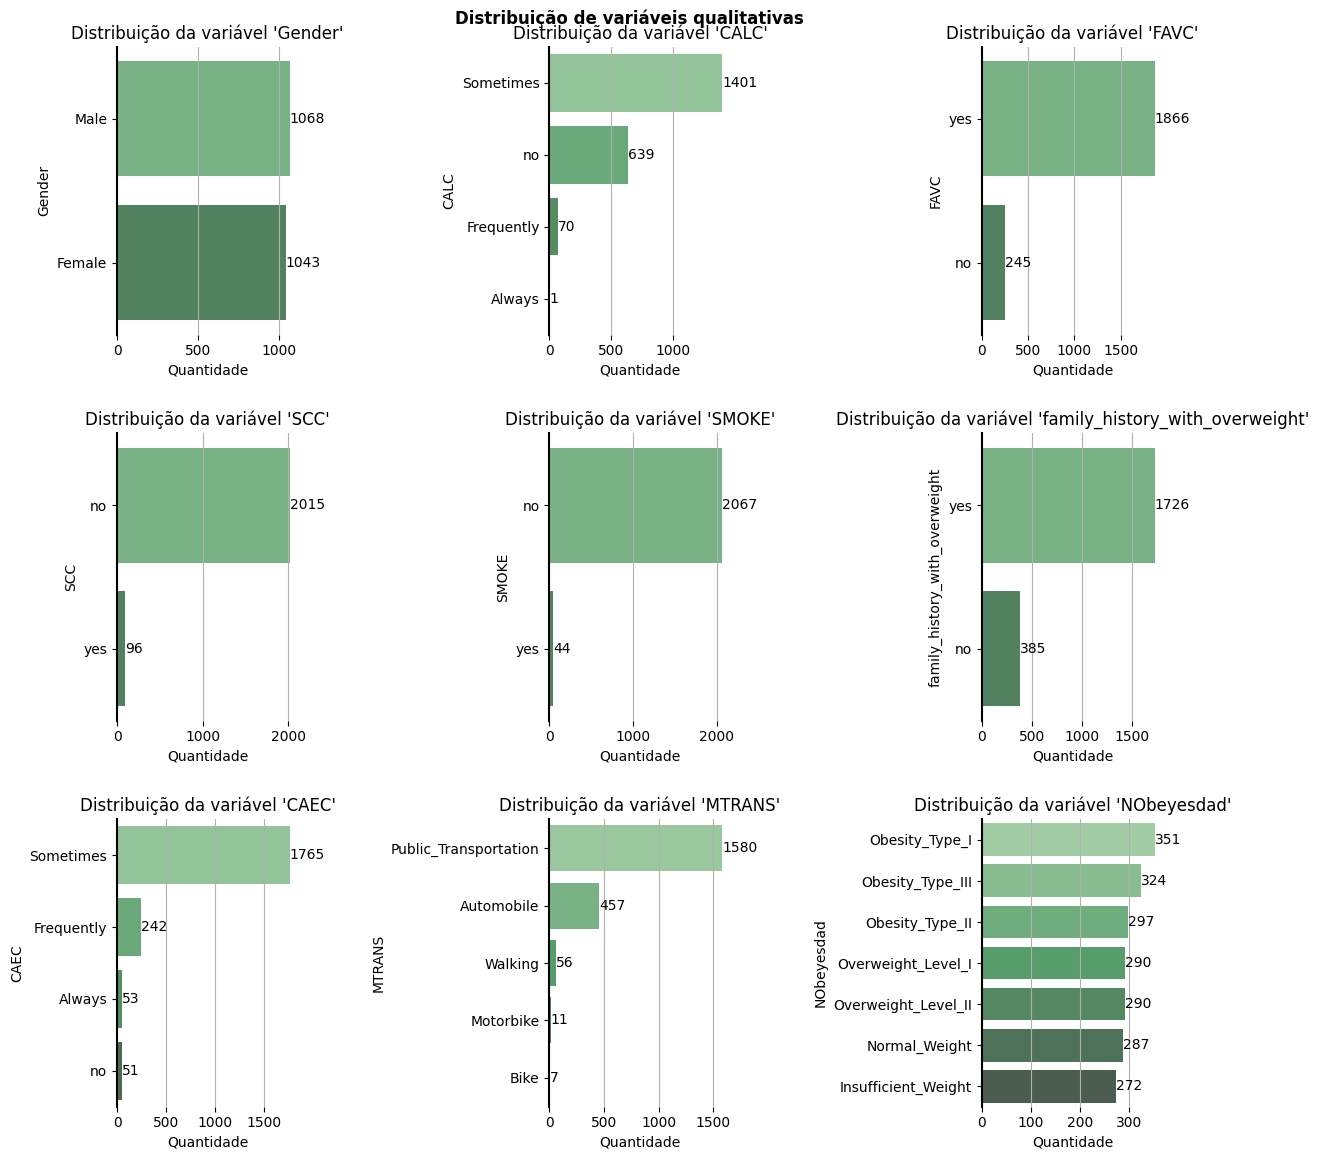

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))
plt.tight_layout(pad=4, w_pad=15, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        y=variavel,
        ax=axes.flatten()[i],
        alpha=0.9,
        order=order,
        palette="Greens_d"
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='edge',
        color='black'
    )
    ax.set(frame_on=False)
    ax.axvline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_xlabel('Quantidade')
    ax.grid(axis='x', linestyle='-')
plt.show()

- Podemos observar que a distribuição do sexo está balanceada
- A maioria pratica atividade física algumas vezes, contudo, uma parte considerável não pratica atividade nenhuma.
- A maioria dos indivíduos consome alimentos altamente calóricos
- A maioria dos indivíduos não monitora as calorias ingeridas diariamente
- Grande parte dos indivíduos não fuma
- Grande parte dos indivíduos tem alguem na família que sofre ou sofreu de excesso de peso
- A maioria dos indivíduos, as vezes, consomem algum alimento entre as refeições
- Nota-se que os dois maiores níveis de são Obesidade tipo I e tipo III, respectivamente, contudo, não há uma alta variação entre os níveis.
***

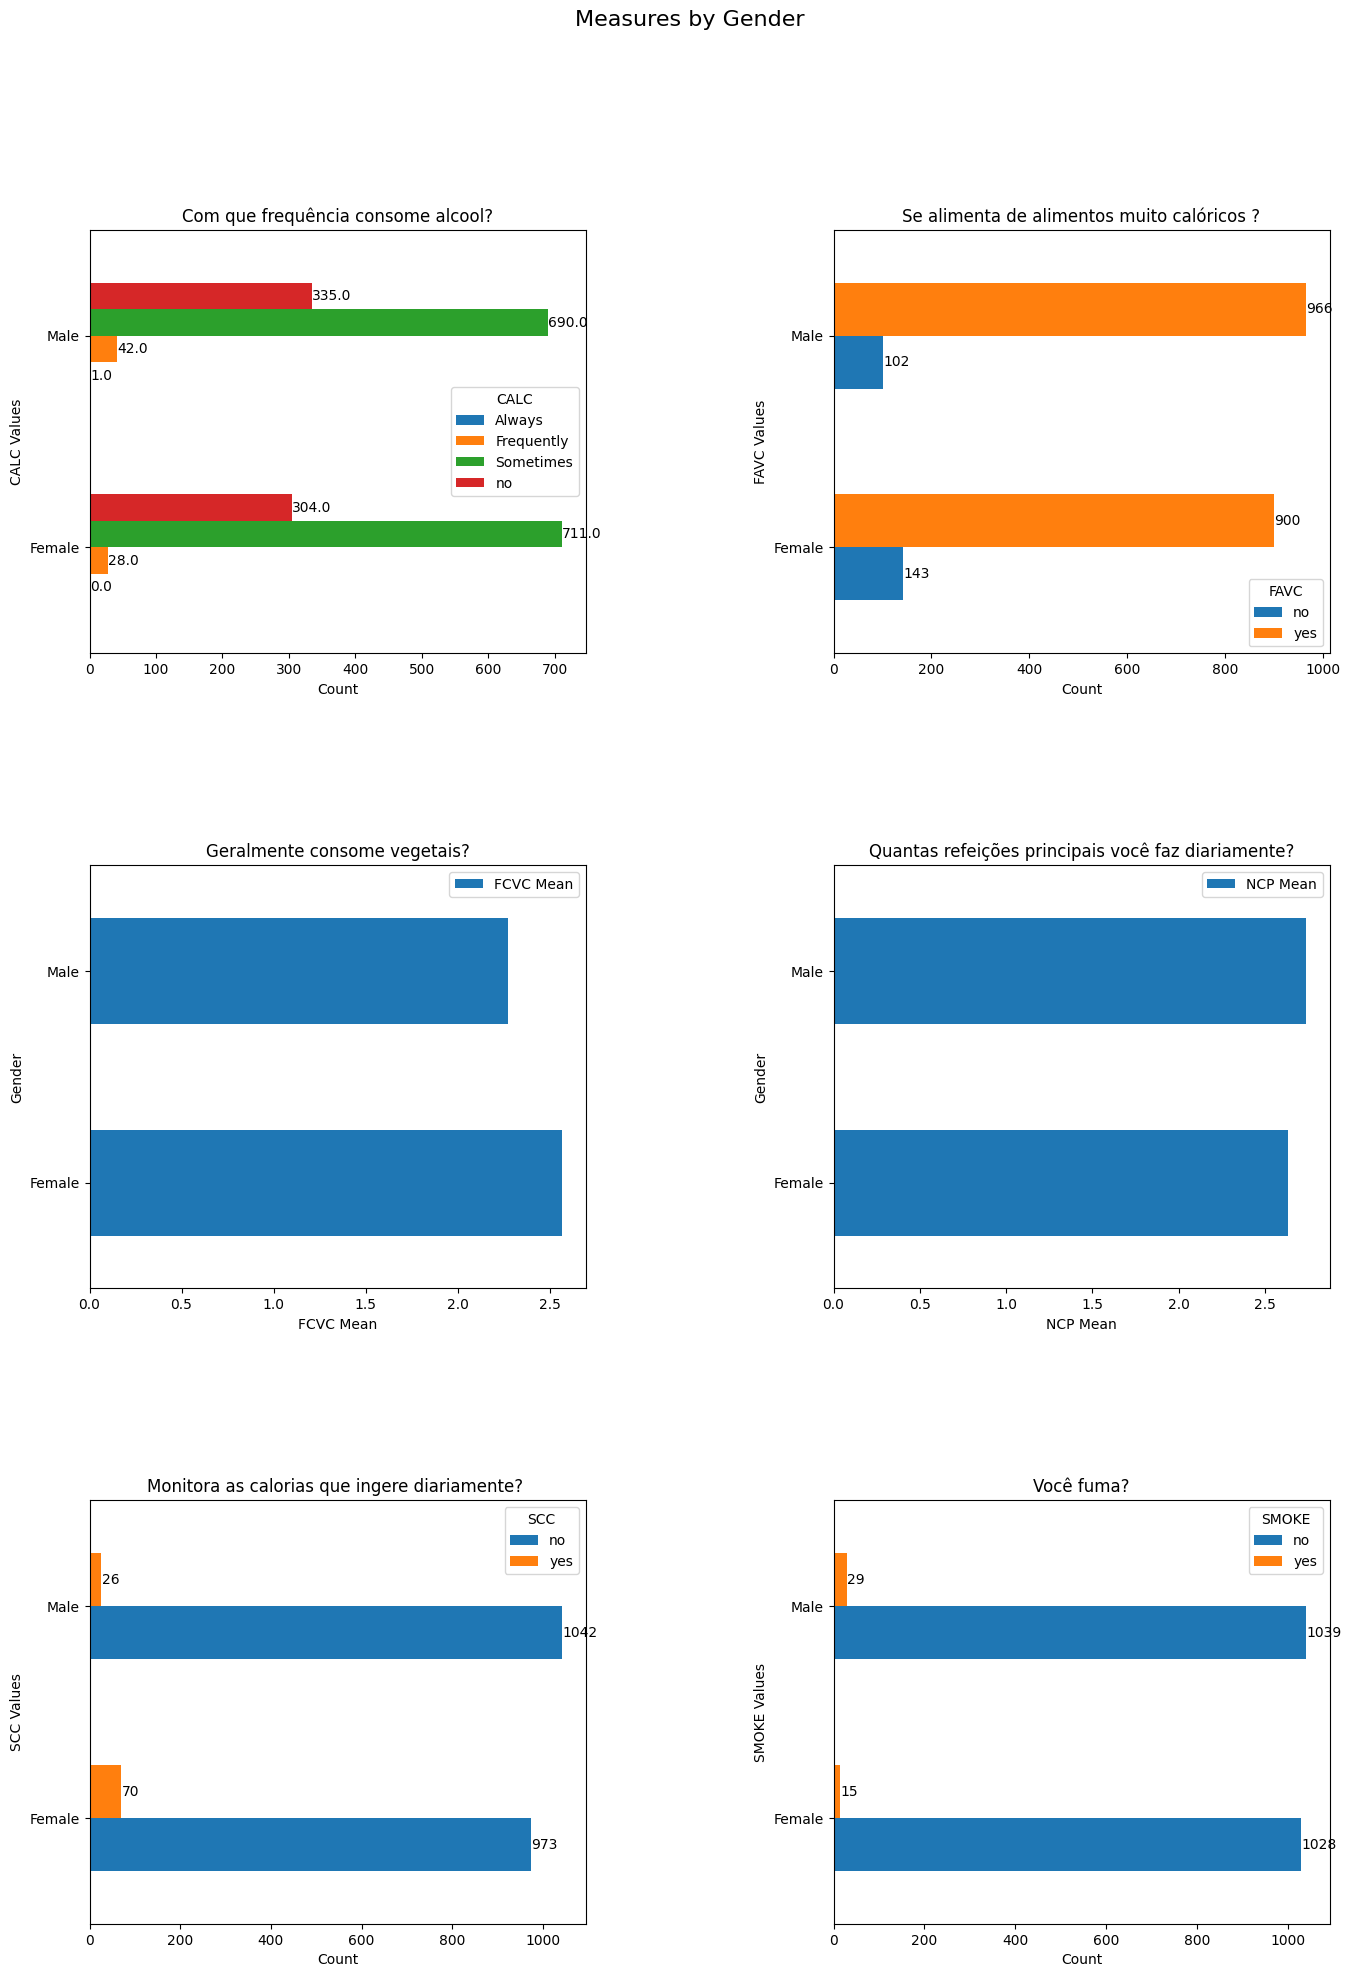

In [31]:
grouped = df.groupby('Gender')

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 22))
fig.suptitle('Measures by Gender', fontsize=16)

calc_counts = grouped['CALC'].value_counts().unstack()
calc_counts.plot(kind='barh', ax=axes[0, 0])

axes[0, 0].set_title('Com que frequência consome alcool?')
axes[0, 0].set_ylabel('CALC Values')
axes[0, 0].set_xlabel('Count')
for p in axes[0, 0].patches:
    axes[0, 0].annotate(str(p.get_width()), (p.get_width() + 0.5, p.get_y() + p.get_height() / 2.),
                        ha='left', va='center')

favc_counts = grouped['FAVC'].value_counts().unstack()
favc_counts.plot(kind='barh', ax=axes[0, 1])

axes[0, 1].set_title('Se alimenta de alimentos muito calóricos ?')
axes[0, 1].set_ylabel('FAVC Values')
axes[0, 1].set_xlabel('Count')
for p in axes[0, 1].patches:
    axes[0, 1].annotate(str(p.get_width()), (p.get_width() + 0.5, p.get_y() + p.get_height() / 2.),
                        ha='left', va='center')

fcvc_means = grouped['FCVC'].mean().reset_index()
fcvc_means.columns = ['Gender', 'FCVC Mean']
fcvc_means.set_index('Gender', inplace=True)
fcvc_means.plot(kind='barh', ax=axes[1, 0])

axes[1, 0].set_title('Geralmente consome vegetais?')
axes[1, 0].set_ylabel('Gender')
axes[1, 0].set_xlabel('FCVC Mean')
for p in axes[1, 0].patches:
    bar_width = p.get_width()
    bar_height = p.get_height()
    bar_y = p.get_y()
    bar_middle = bar_y + bar_height / 2
    axes[1, 0].annotate(str(round(bar_width, 2)), (bar_width + 0.5, bar_middle), ha='left', va='center')

ncp_means = grouped['NCP'].mean().reset_index()
ncp_means.columns = ['Gender', 'NCP Mean']
ncp_means.set_index('Gender', inplace=True)
ncp_means.plot(kind='barh', ax=axes[1, 1])

axes[1, 1].set_title('Quantas refeições principais você faz diariamente?')
axes[1, 1].set_ylabel('Gender')
axes[1, 1].set_xlabel('NCP Mean')
for p in axes[1, 1].patches:
    bar_width = p.get_width()
    bar_height = p.get_height()
    bar_y = p.get_y()
    bar_middle = bar_y + bar_height / 2
    axes[1, 1].annotate(str(round(bar_width, 2)), (bar_width + 0.5, bar_middle), ha='left', va='center')

scc_counts = grouped['SCC'].value_counts().unstack()
scc_counts.plot(kind='barh', ax=axes[2, 0])

axes[2, 0].set_title('Monitora as calorias que ingere diariamente? ')
axes[2, 0].set_ylabel('SCC Values')
axes[2, 0].set_xlabel('Count')
for p in axes[2, 0].patches:
    axes[2, 0].annotate(str(p.get_width()), (p.get_width() + 0.5, p.get_y() + p.get_height() / 2.),
                        ha='left', va='center')

smoke_counts = grouped['SMOKE'].value_counts().unstack()
smoke_counts.plot(kind='barh', ax=axes[2, 1])

axes[2, 1].set_title('Você fuma?')
axes[2, 1].set_ylabel('SMOKE Values')
axes[2, 1].set_xlabel('Count')
for p in axes[2, 1].patches:
    axes[2, 1].annotate(str(p.get_width()), (p.get_width() + 0.5, p.get_y() + p.get_height() / 2.),
                        ha='left', va='center')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()


*Consumo de Álcool (CALC)*

- A maioria consome álcool "Sometimes" (Às vezes), com uma distribuição semelhante entre gêneros.

*Alimentos Muito Calóricos (FAVC)*

- A maioria consome alimentos muito calóricos, sem grandes diferenças entre gêneros.

*Consumo de Vegetais (FCVC)*

- A média de consumo de vegetais é ligeiramente maior entre as mulheres.

*Número de Refeições Diárias (NCP)*

- Número médio de refeições diárias é similar entre gêneros.

*Monitoramento de Calorias (SCC)*

- A maioria não monitora suas calorias diariamente, independente do gênero.

*Hábito de Fumar (SMOKE)*

- Maior prevalência de fumar entre homens comparado às mulheres.

Esses gráficos mostram que, embora existam algumas diferenças, os padrões gerais de consumo e hábitos são bastante similares entre homens e mulheres.

***

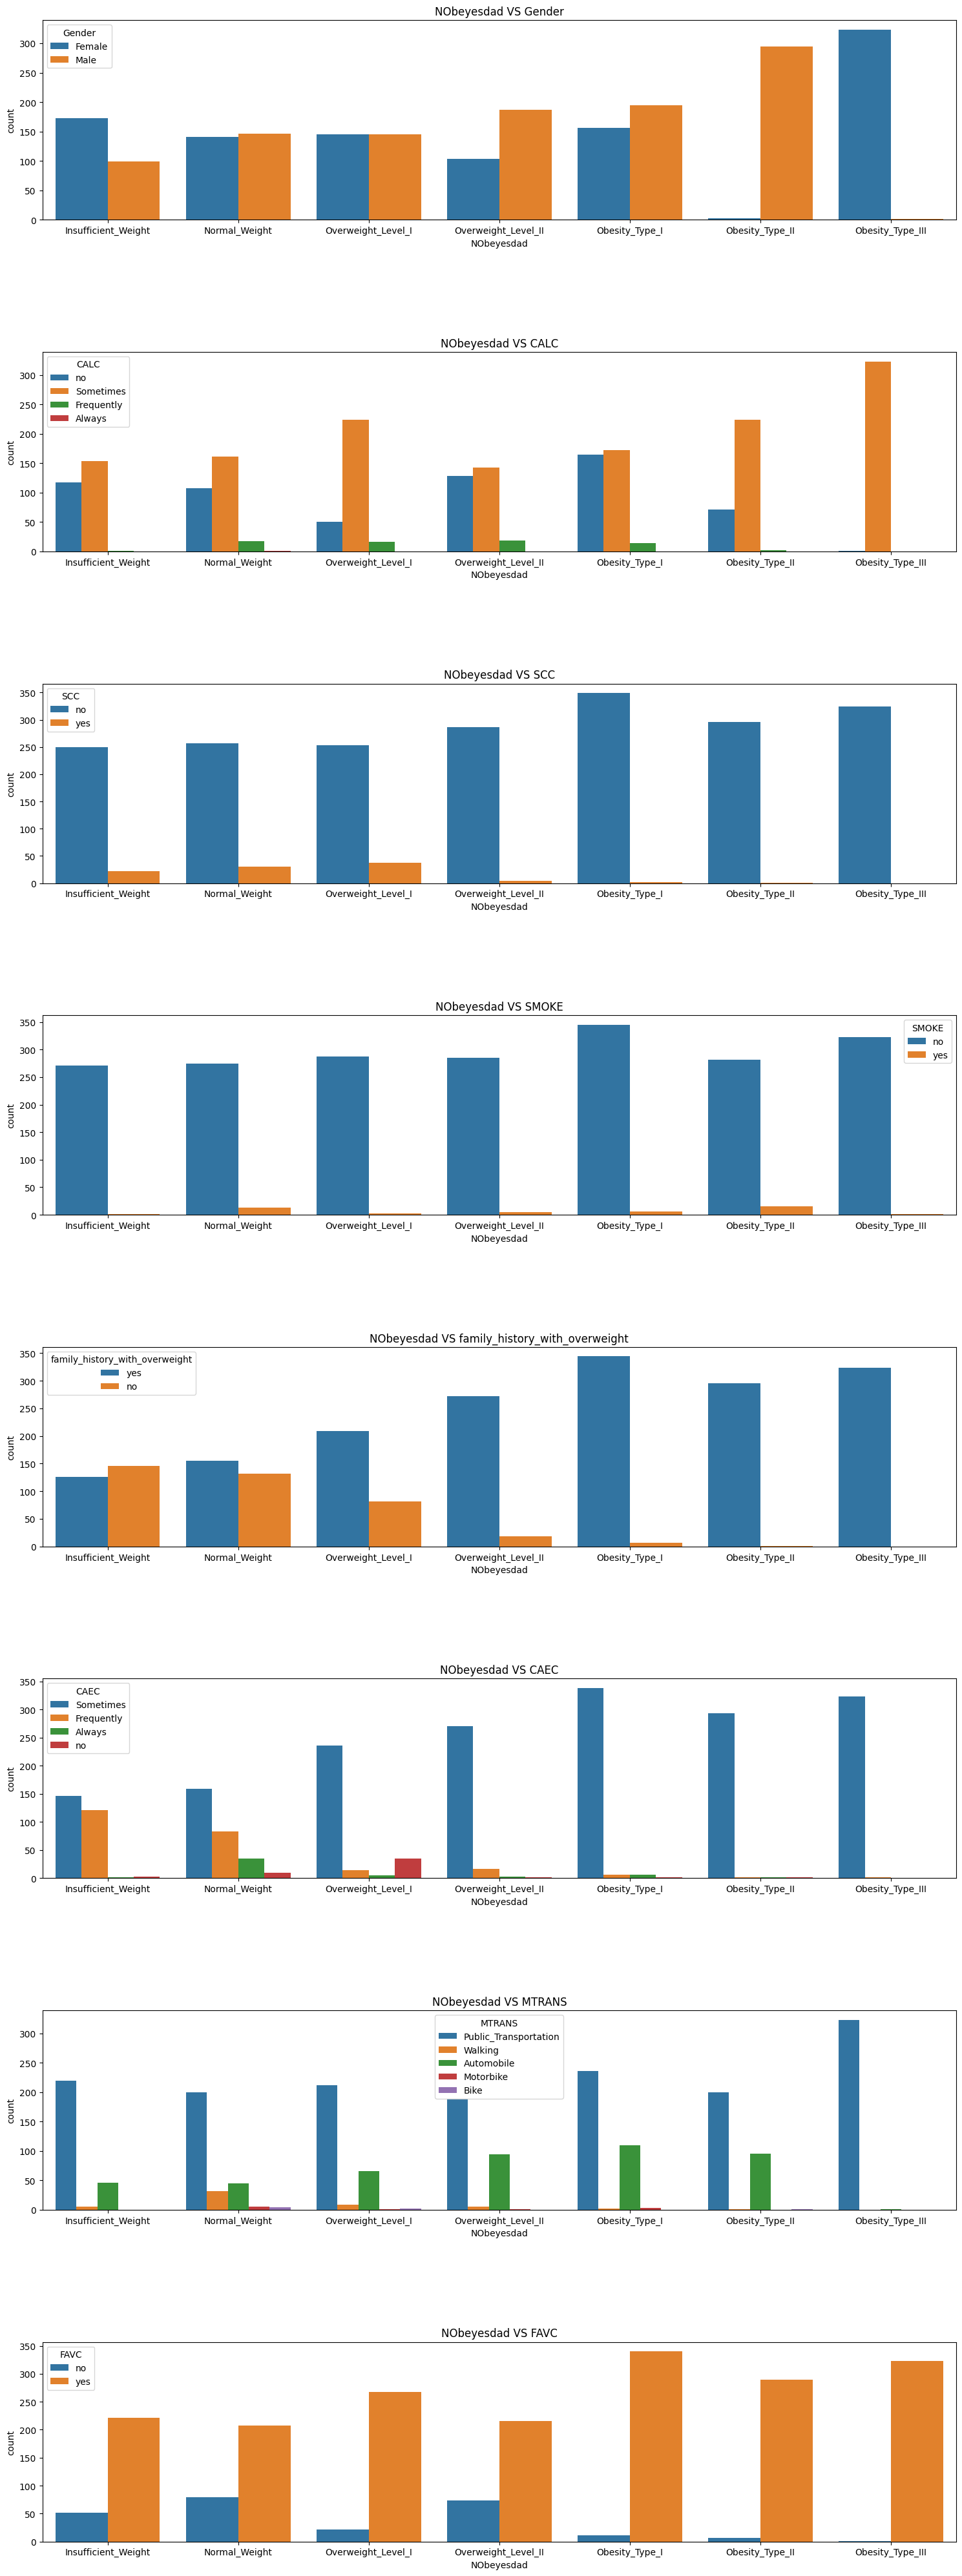

In [50]:
categories_order = [
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
]

df['NObeyesdad'] = pd.Categorical(df['NObeyesdad'], categories=categories_order, ordered=True)


cat_cols = ['Gender', 'CALC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'FAVC']
fig, ax = plt.subplots(nrows=8, figsize=(15, 40))

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x='NObeyesdad', hue=col, ax=ax[i])
    ax[i].set_title(f'NObeyesdad VS {col}')
    ax[i].set_xticklabels(ax[i].get_xticklabels())

fig.tight_layout(h_pad=10)
plt.show()


Esses gráficos ajudam a identificar padrões e relações entre diferentes variáveis categóricas e os níveis de obesidade, fornecendo uma visão geral das associações entre comportamento, hábitos e obesidade.

- É possível verificar que em ```Obesity_Type II``` a grande maioria é do gênero masculino
- Em ```Obesity_Type III```, o gênero feminino é predominante
- É possível notar que o nível de consumo de álcool aumenta em relação ao nível de obesidade
- Os indivíduos que se enquadravam entre os indivíduos abaixo do peso ideal e com pesoa ideal estão entre os que mais monitoraram as calorias ingeridas diariamente
- Poucos indivíduos fumam, fumar parecer não ter muita relação com a obesidade
- É possível notar que o quanto mais obeso for o indivíduo, mais casos de excesso de peso familair ele costuma ter
- Pessoas abaixo do peso ideial comem com mais frequência entre as refeições quando comparadas com pessoas obesas
- É possível notar que pessoas com ```Obesity_Type III``` costumam usar mais o ônibus, contudo, essa não parece ser uma relação interessante
- Quando mais obeso, mais ele come alimentos altamente calóricos com frequência
***

**Gráficos de distribuição**

C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vitor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

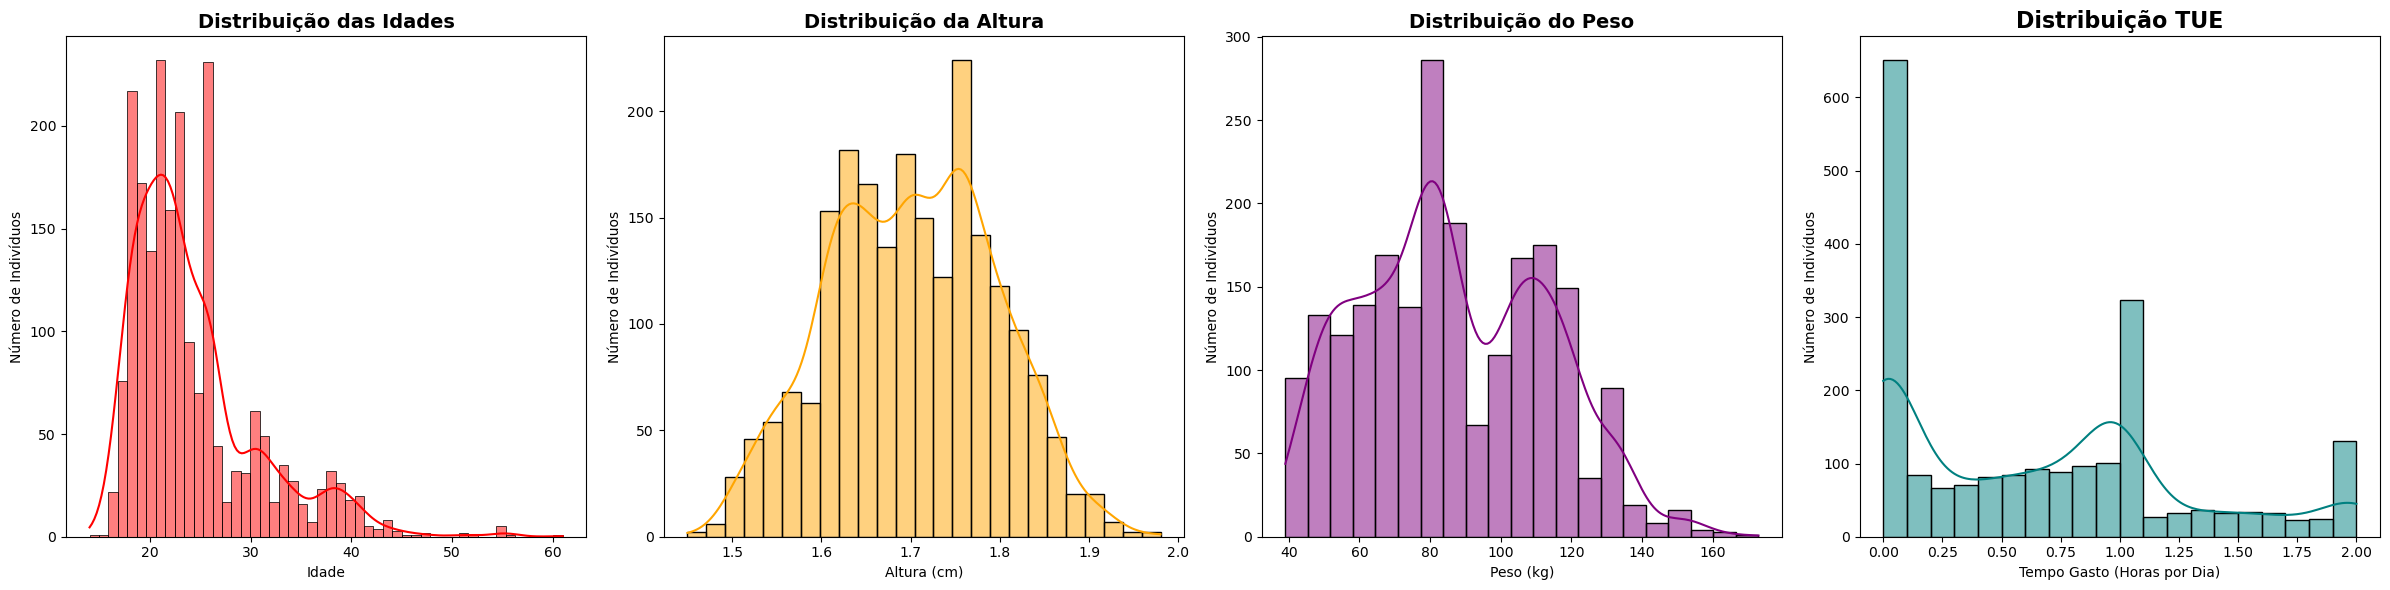

In [98]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 4, 1)
sns.histplot(df["Age"].dropna(), kde=True, color="Red")
plt.title("Distribuição das Idades", fontsize=14, fontweight="bold")
plt.xlabel('Idade')
plt.ylabel('Número de Indivíduos')

plt.subplot(1, 4, 2)
sns.histplot(df["Height"].dropna(), kde=True, color="Orange")
plt.title("Distribuição da Altura", fontsize=14, fontweight="bold")
plt.xlabel('Altura (cm)')
plt.ylabel('Número de Indivíduos')

plt.subplot(1, 4, 3)
sns.histplot(df["Weight"].dropna(), kde=True, color="Purple")
plt.title("Distribuição do Peso", fontsize=14, fontweight="bold")
plt.xlabel('Peso (kg)')
plt.ylabel('Número de Indivíduos')

plt.subplot(1, 4, 4)
sns.histplot(df['TUE'], bins=20, kde=True, color='teal')
plt.title('Distribuição TUE', fontsize=16, fontweight='bold')
plt.xlabel('Tempo Gasto (Horas por Dia)')
plt.ylabel('Número de Indivíduos')

plt.tight_layout()
plt.show()

-  É possível notar que 
-  Ajuda a entender se há uma variação significativa na altura entre os indivíduos.
-  Mostra como os pesos estão distribuídos e se a amostra cobre uma variedade de valores de peso.
-  Visualiza quanto tempo o indivíduo passa usando dispositivos tecnológicos	
***

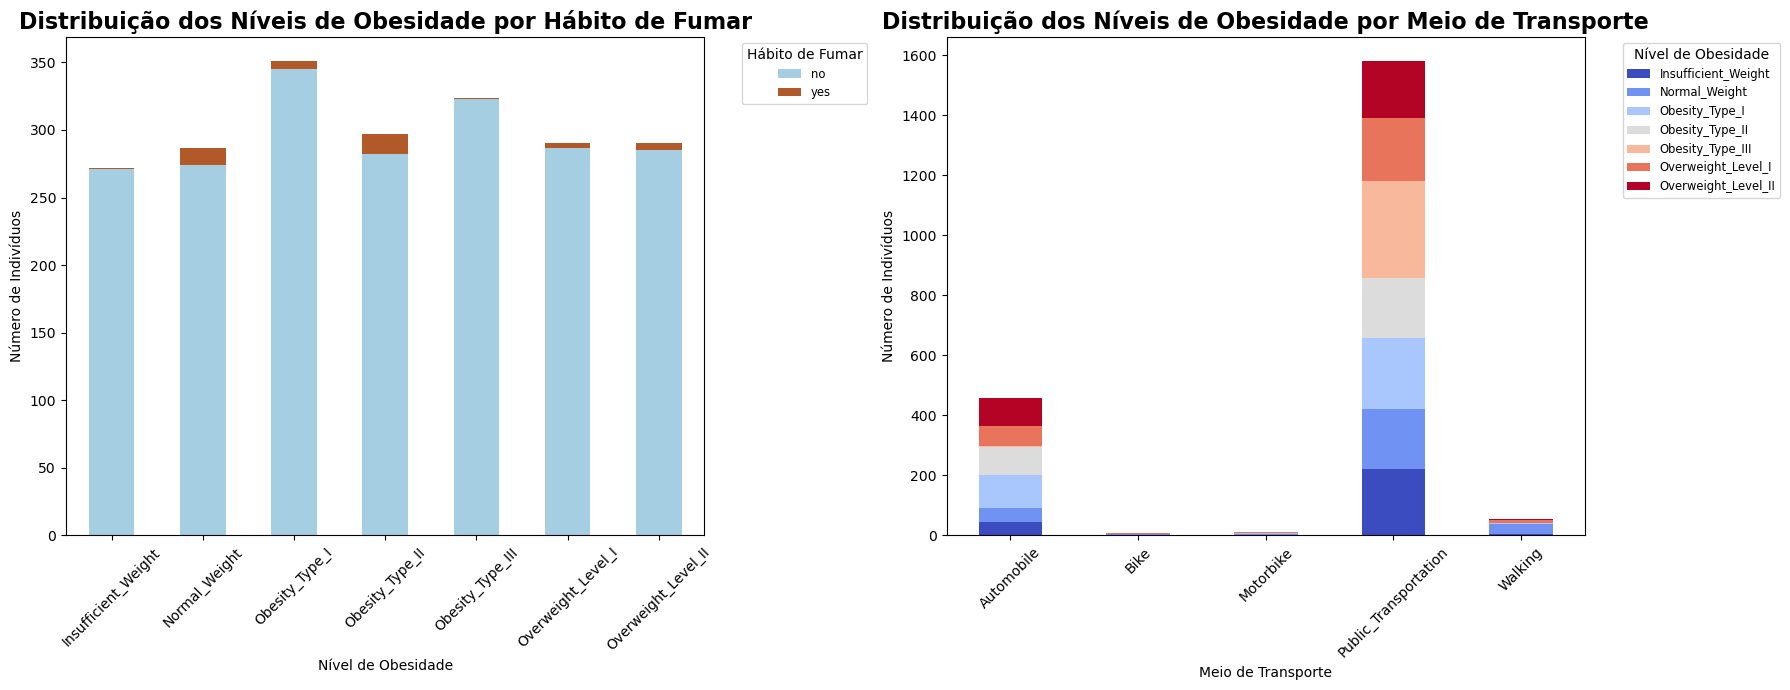

In [74]:
grouped_data_smoke = df.groupby(['NObeyesdad', 'SMOKE']).size().unstack(fill_value=0)

grouped_data_transport = df.groupby(['MTRANS', 'NObeyesdad']).size().unstack().fillna(0)

plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
grouped_data_smoke.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca())
plt.title('Distribuição dos Níveis de Obesidade por Hábito de Fumar', fontsize=16, fontweight='bold')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Número de Indivíduos')
plt.xticks(rotation=45)
plt.legend(title='Hábito de Fumar', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='medium')

plt.subplot(1, 2, 2)
grouped_data_transport.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())
plt.title('Distribuição dos Níveis de Obesidade por Meio de Transporte', fontsize=16, fontweight='bold')
plt.xlabel('Meio de Transporte')
plt.ylabel('Número de Indivíduos')
plt.xticks(rotation=45)
plt.legend(title='Nível de Obesidade', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()


Esses gráficos oferecem uma visão sobre como hábitos de fumar e opções de transporte podem estar associados a níveis de obesidade, ajudando a entender comportamentos relacionados à saúde.
***

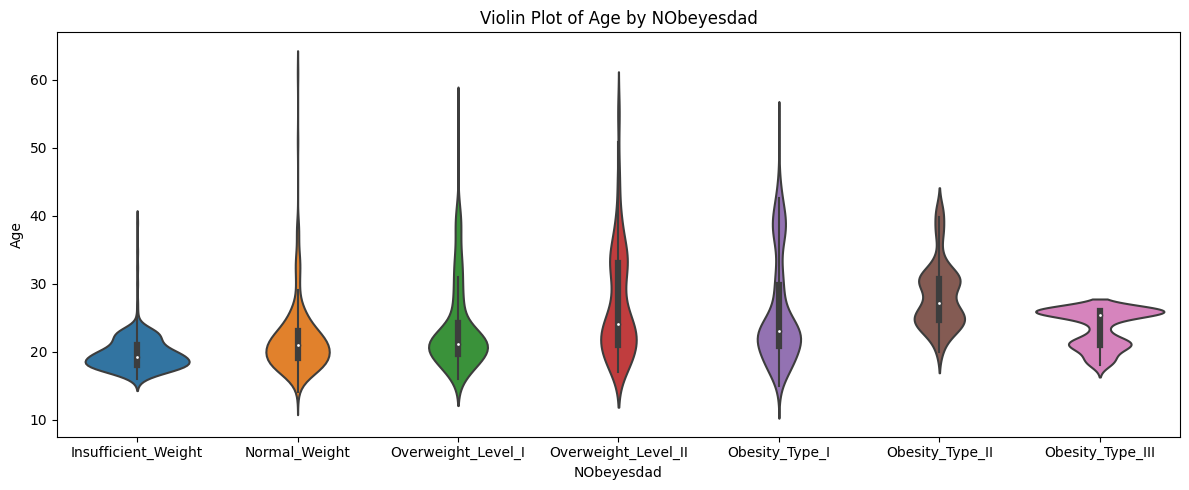

In [55]:
plt.figure(figsize=(12, 5))  
sns.violinplot(data=df, x='NObeyesdad', y='Age')
plt.title('Violin Plot of Age by NObeyesdad')
plt.tight_layout()
plt.show()

- É observável notar uma possível mortalidade entre os pacientes mais obesos, visto que ```Obesity_type II``` não chegam a 50 anos e ```Obesity_type III``` não passam dos 30 anos.

## 3. Insights

- Há poucos homens com obesidade tipo 3 em relação às mulheres, em contrapartida o cenário é oposto na análise de obesidade tipo 2
- Voluntários de todos os níveis consomem bebidas alcoólicas as vezes
- A maior parte dos voluntários tem histórico familiar de sobrepeso.
- A maioria dos voluntários não acompanha a ingestão de calorias.
- A maior parte dos voluntários não fuma.
- A maioria dos voluntários ingere alimentos entre as refeições ocasionalmente.
- A maior parte dos voluntários utiliza transporte público.
- A maior parte dos voluntários é classificada com Obesidade Tipo I.
- A maioria dos voluntários está entre 19 e 26 anos.
  

## 4. Observações

Não foram extraídas conclusões a partir dos dados e/ou visualizações apresentados. Para realizar essa tarefa adequadamente, seria imprescindível contar com a expertise de um especialista no assunto.
***